In [36]:
import json
import matplotlib.pyplot as plt
import numpy as np

MAX_SIZE = 100

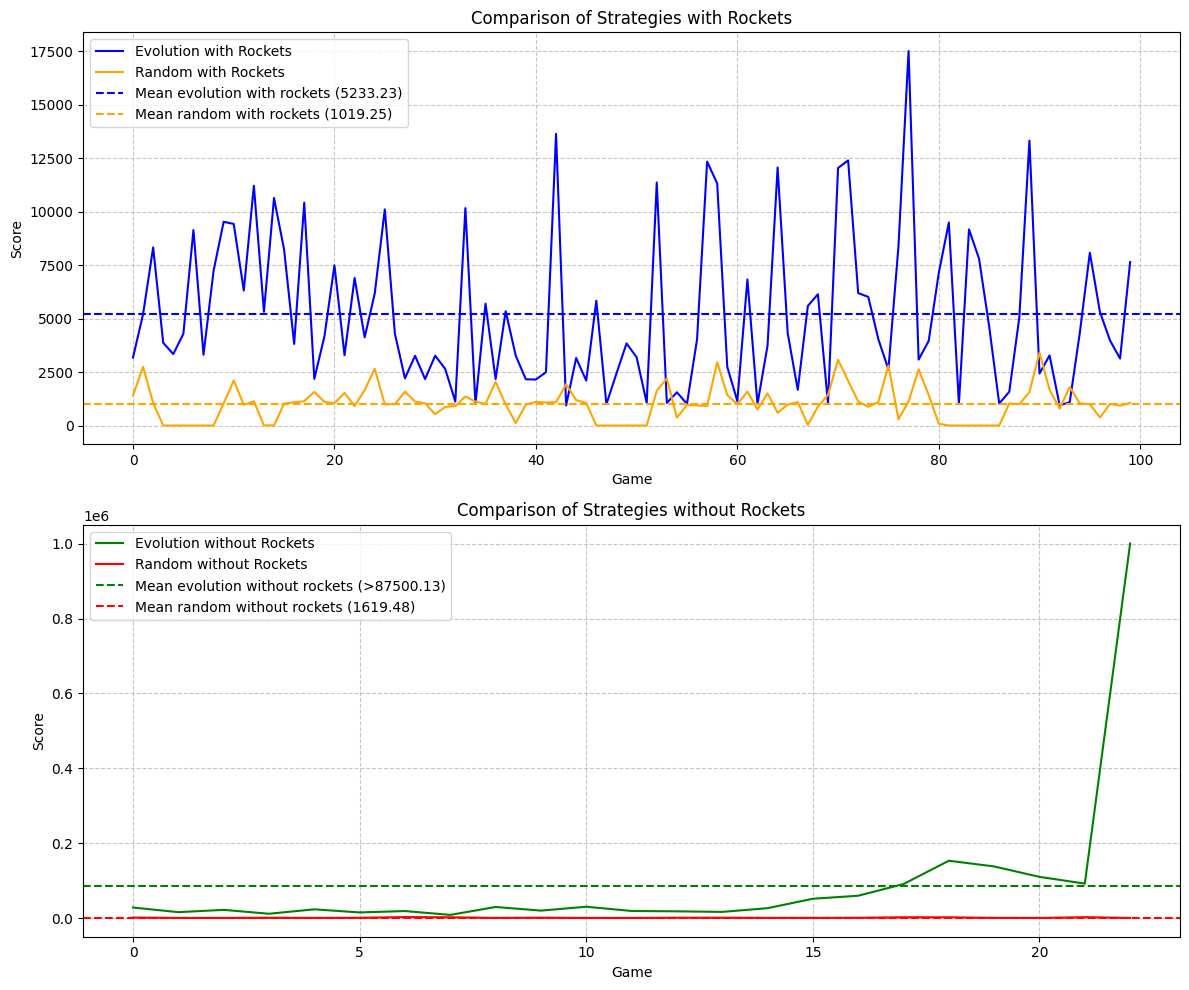

In [49]:
evolution_scores_without_rockets_path = "evolution_agent_without_rockets_scores.json"
evolution_scores_with_rockets_path = "evolution_with_rockets_scores.json"

random_with_rockets_path = "random_scores_with_rockets.json"
random_without_rockets_path = "random_scores_without_rockets.json"

# load data
with open(evolution_scores_without_rockets_path, "r") as f:
    data = json.load(f)
    evolution_without_rockets = data[len(data) - MAX_SIZE:]

with open(evolution_scores_with_rockets_path, "r") as f:
    data = json.load(f)
    evolution_scores_with_rockets =  data[len(data) - MAX_SIZE:]

with open(random_with_rockets_path, "r") as f:
    random_with_rockets = json.load(f)[:MAX_SIZE]

with open(random_without_rockets_path, "r") as f:
    random_without_rockets = json.load(f)[:MAX_SIZE if MAX_SIZE < len(evolution_without_rockets)  else len(evolution_without_rockets)]


# compare without rockets and with rockets evolution and random with rockets and without rockets

# Create the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot for strategies with rockets
ax1.plot(evolution_scores_with_rockets, label='Evolution with Rockets', color='blue')
ax1.plot(random_with_rockets, label='Random with Rockets', color='orange')
# add means
mean = np.mean(evolution_scores_with_rockets)
mean_random = np.mean(random_with_rockets)
ax1.axhline(y=mean, color="blue", linestyle="--", label=f"Mean evolution with rockets ({mean:.2f})")
ax1.axhline(y=mean_random, color="orange", linestyle="--", label=f"Mean random with rockets ({mean_random:.2f})")

ax1.set_title('Comparison of Strategies with Rockets')
ax1.set_xlabel('Game')
ax1.set_ylabel('Score')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot for strategies without rockets
ax2.plot(evolution_without_rockets, label='Evolution without Rockets', color='green')
ax2.plot(random_without_rockets, label='Random without Rockets', color='red')
ax2.set_title('Comparison of Strategies without Rockets')
ax2.set_xlabel('Game')
ax2.set_ylabel('Score')
# add means
mean = np.mean(evolution_without_rockets)
mean_random = np.mean(random_without_rockets)
ax2.axhline(y=mean, color="green", linestyle="--", label=f"Mean evolution without rockets (>{mean:.2f})")
ax2.axhline(y=mean_random, color="red", linestyle="--", label=f"Mean random without rockets ({mean_random:.2f})")
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [50]:
data =  json.load(open("evolution_agent_without_rockets_scores.json", "r"))

In [51]:
# table of top 5 scores and their generation
MAX_SCORE = 1000000
def top_scores(data, n=5):
    scores = [(i, score) for i, score in enumerate(data)]
    scores.sort(key=lambda x: x[1], reverse=True)
    return scores[:n]


top_scores_results = top_scores(data)
print("Top scores:")
for i, score in top_scores_results:
    print(f"Generation: {i+1}, score: {">" if score ==MAX_SCORE}{score}")

Top scores:
Generation: 23, score: 1000000
Generation: 19, score: 153678
Generation: 20, score: 138447
Generation: 21, score: 110601
Generation: 22, score: 92685
